In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

database_path = 'employees_homework'
host = 'localhost'
port = 5432
username = 'postgres'
password = 'Analytics20'
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database_path}')


In [39]:
connection = engine.connect()

In [40]:
employees = pd.read_sql("SELECT * FROM employees", connection)
departments = pd.read_sql("SELECT * FROM departments", connection)
dept_emp = pd.read_sql("SELECT * FROM dept_emp", connection)
dept_manager = pd.read_sql("SELECT * FROM dept_manager", connection)
salaries = pd.read_sql("SELECT * FROM salaries", connection)
titles = pd.read_sql("SELECT * FROM titles", connection)

Create a histogram to visualize the most common salary ranges for employees.

In [41]:
salaries

,emp_no,salaries,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12
...,...,...,...,...
300019,499995,40000,1997-06-02,1998-06-02
300020,499996,58058,1996-05-13,1997-05-13
300021,499997,49597,1987-08-30,1988-08-29
300022,499998,40000,1993-12-27,1994-12-27


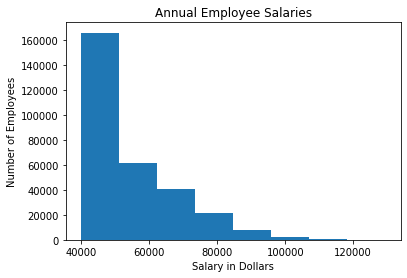

In [46]:
#plt.salaries.hist(column='salaries', bins=6)

salaries['salaries'].plot(kind='hist', bins=8, title='Annual Employee Salaries')
plt.xlabel('Salary in Dollars')
plt.ylabel('Number of Employees')
plt.show()


Create a bar chart of average salary by title.

In [47]:
combined_data = pd.merge(titles, salaries, on="emp_no", how="inner")

In [70]:
avg_salary = round(combined_data.groupby('title').mean(),2).reset_index()

In [80]:
avg_salary = avg_salary.sort_values('salaries')

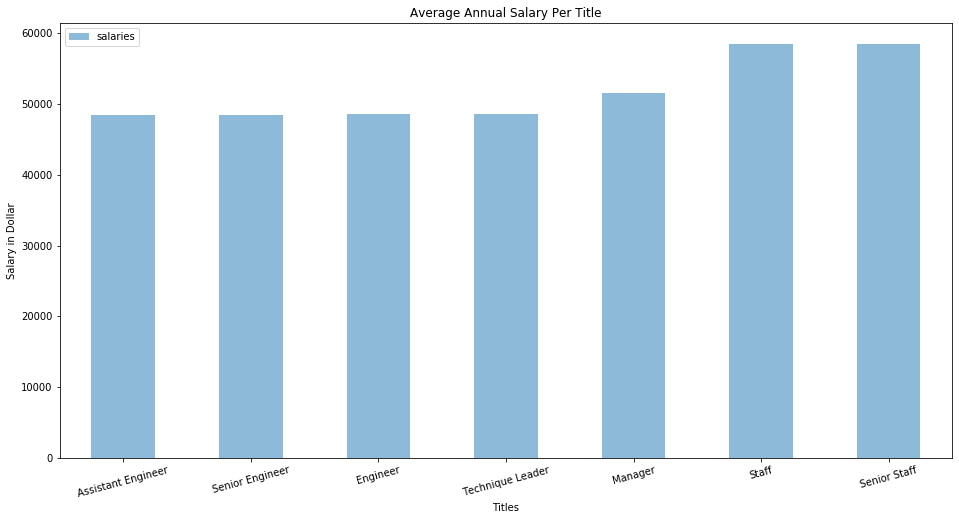

In [81]:
avg_salary.plot(kind='bar', x='title', y='salaries', alpha=0.5, figsize=(16, 8), rot=15)
plt.title('Average Annual Salary Per Title')
plt.xlabel('Titles')
plt.ylabel('Salary in Dollar')
plt.show()